Perceptron Simples com Sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [18]:
from sklearn import preprocessing # biblioteca para suporte ao pré-processamento
from sklearn.model_selection import train_test_split # biblioteca para separação de amostras para treino e teste
from sklearn.linear_model import Perceptron # biblioteca com funções para a execução da RNA Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics # biblioteca para obtenção de métricas para avaliação dos modelos
import matplotlib.pyplot as plt # biblioteca para plotar gráfico
import numpy as np
import pandas as pd
import random # biblioteca aplicada na geração de números randômicos
from google.colab import drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/dataset_bancario/bancario.csv")

In [20]:
# separando a coluna da classe de todas as amostras do dataset
y = df.iloc[:, 3].values

# substituindo o valor string em numérico, baseado no que determina a função de ativação
y = np.where(y == 'mau', -1, 1)

# separando as colunas com as variáveis das amostras do dataset para determinar os inputs da RNA
X = df.iloc[:, [1,2]].values

print(y.shape)
print(X.shape)

(21,)
(21, 2)


In [21]:
# normalização dos dados sklearn - dados entre 0 e 1 - https://pt.linux-console.net/?p=5847
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

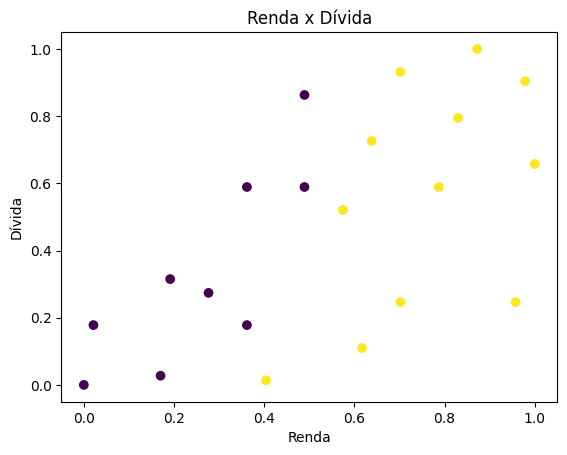

In [28]:
# plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Renda x Dívida" )
plt.xlabel('Renda')
plt.ylabel('Dívida')
plt.show()

In [23]:
# separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

print(X_train.shape)
print(y_train.shape)

(14, 2)
(14,)


In [24]:
p = Perceptron(penalty='l2', alpha=0.0001, shuffle=True, eta0=1.0, random_state=0, early_stopping=True, validation_fraction=0.1, n_iter_no_change=5)
p.fit(X_train, y_train)

Perceptron(early_stopping=True, penalty='l2')

In [25]:
predictions_train = p.predict(X_train) # validação do conjunto de amostras treinadas
train_score = accuracy_score(predictions_train, y_train) # avaliação de acurácia da classificação das amostras que foram apresentadas no treinamento
print("Acurácia com dados de treinamento: ", train_score)

predictions_test = p.predict(X_test) # validação do conjunto de amostras que não participaram do treinamento
test_score = accuracy_score(predictions_test, y_test) # avaliação de acurácia da classificação das amostras que não foram apresentadas no treinamento
print("Acurácia com dados de teste: ", test_score)

print(classification_report(predictions_test, y_test))

print("Número de épocas no treinamento: ", p.n_iter_)
print("Lista de parâmetros configurados na Perceptron: ", p.get_params())

Acurácia com dados de treinamento:  0.9285714285714286
Acurácia com dados de teste:  1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Número de épocas no treinamento:  6
Lista de parâmetros configurados na Perceptron:  {'alpha': 0.0001, 'class_weight': None, 'early_stopping': True, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


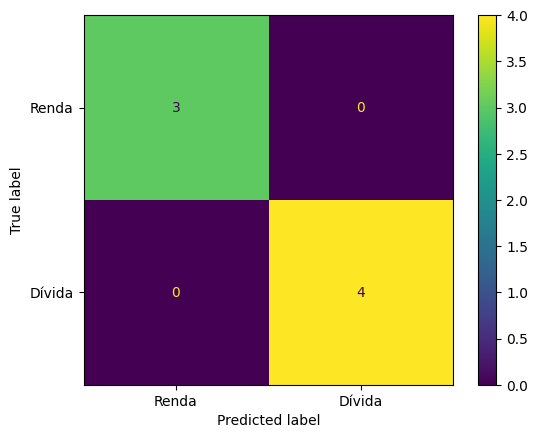

In [26]:
# Apresentação gráfica da matriz de confusão dos testes classificados
conf_matrix = confusion_matrix(y_test, predictions_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Renda', 'Dívida'])
cm_display.plot()
plt.show()

In [27]:
# Teste individual de amostras já normalizadas
A = X[0, :] # Sabe-se de antemão que a classificação correta para esta amostra é = 1
A_y = np.array([1]) # Força-se classicação 1
B = X[1, :] # Sabe-se de antemão que a classificação correta para esta amostra é = -1
B_y = np.array([1]) # Força-se classicação 1
C = X[18, :] # Sabe-se de antemão que a classificação correta para esta amostra é = -1
C_y = np.array([1]) # Força-se classicação 1
D = X[19, :] # Sabe-se de antemão que a classificação correta para esta amostra é = 1
D_y = np.array([1]) # Força-se classicação 1
E = X[20, :] # Sabe-se de antemão que a classificação correta para esta amostra é = 1
E_y = np.array([1]) # Força-se classicação 1

prediction_A = p.predict([A])
prediction_B = p.predict([B])
prediction_C = p.predict([C])
prediction_D = p.predict([D])
prediction_E = p.predict([E])
print("Acurácia com dados de A: ", accuracy_score(prediction_A, A_y))
print("Acurária com dados de B: ", accuracy_score(prediction_B, B_y))
print("Acurácia com dados de C: ", accuracy_score(prediction_C, C_y))
print("Acurária com dados de D: ", accuracy_score(prediction_D, D_y))
print("Acurária com dados de E: ", accuracy_score(prediction_E, E_y))

Acurácia com dados de A:  1.0
Acurária com dados de B:  0.0
Acurácia com dados de C:  0.0
Acurária com dados de D:  1.0
Acurária com dados de E:  1.0
